# Data Preparation

## 01 Import Libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

## 02 Load Data

In [36]:
#loading iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
#df['target'] = iris.target

In [37]:
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA

In [38]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [50]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: Species, dtype: int64

In [51]:
# shape of the data
df.shape

(149, 5)

In [52]:
# checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [53]:
# checking for duplicate values
df.duplicated().sum()

0

In [54]:
df = df.drop_duplicates()

In [55]:
# checking the balance of the data
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     49
dtype: int64

In [56]:
# checking the data types
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


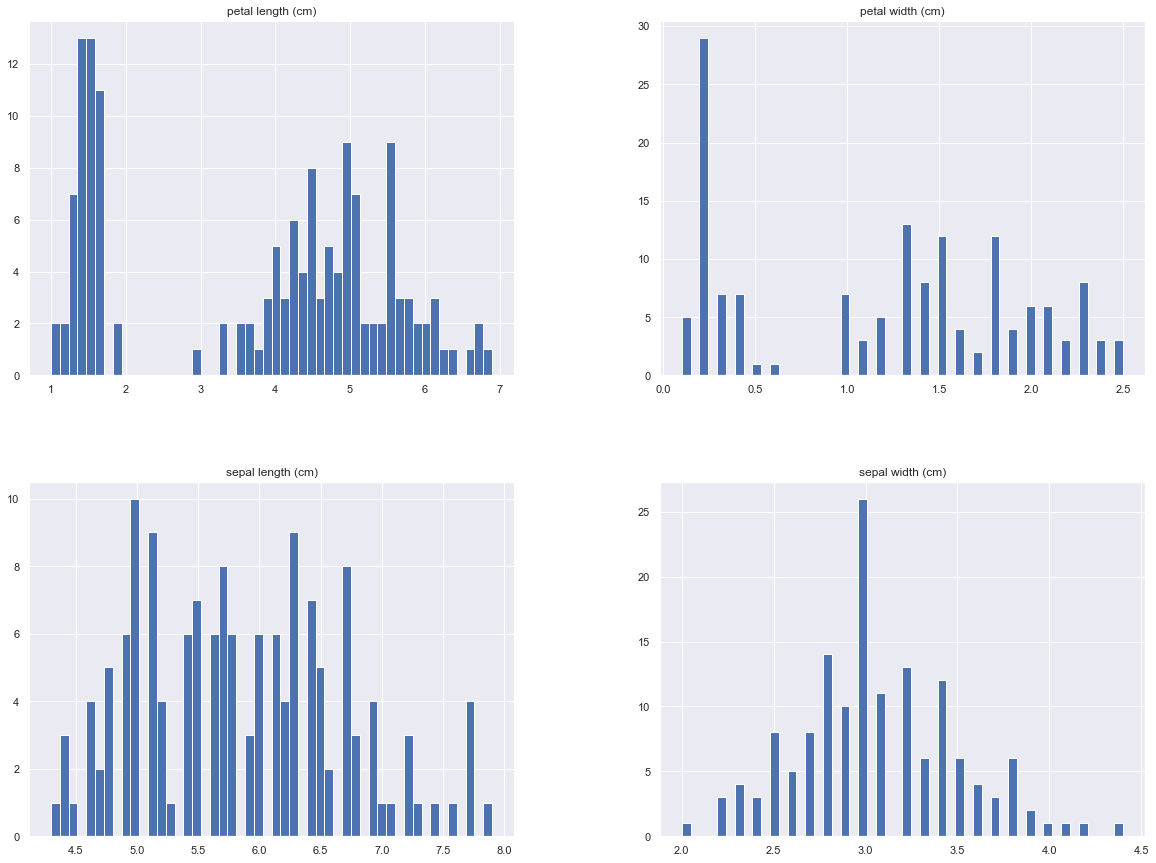

In [57]:
# checking for outliers
df.hist(bins=50, figsize=(20,15));

In [58]:
# checking for correlation
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


[]

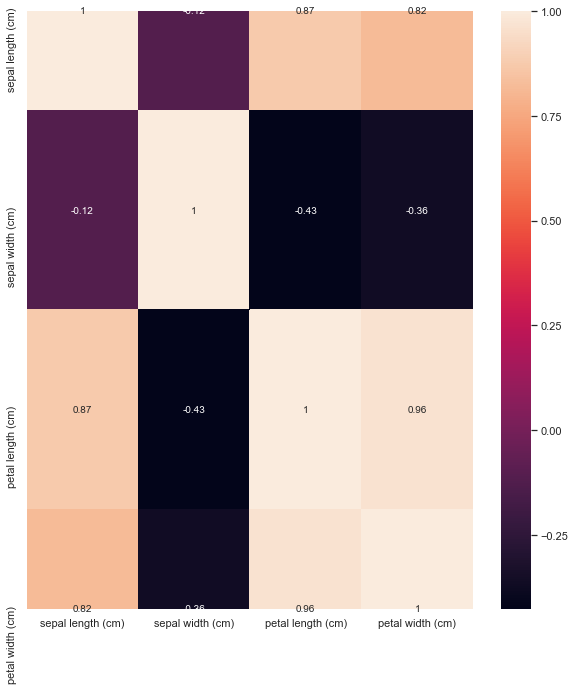

In [69]:
# heatmap of the correlation

plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

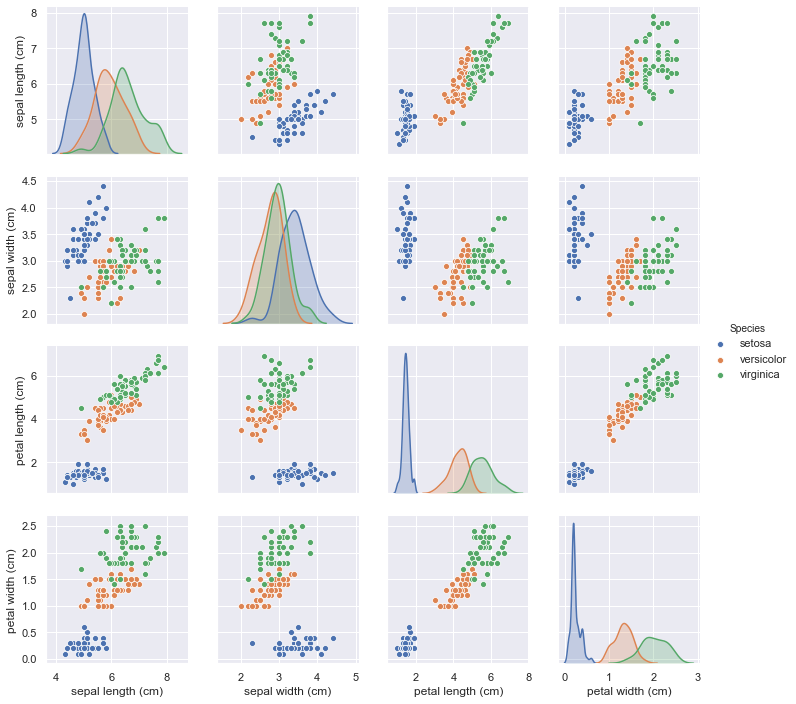

In [60]:
sns.pairplot(df, hue='Species', size=2.5);
plt.show()

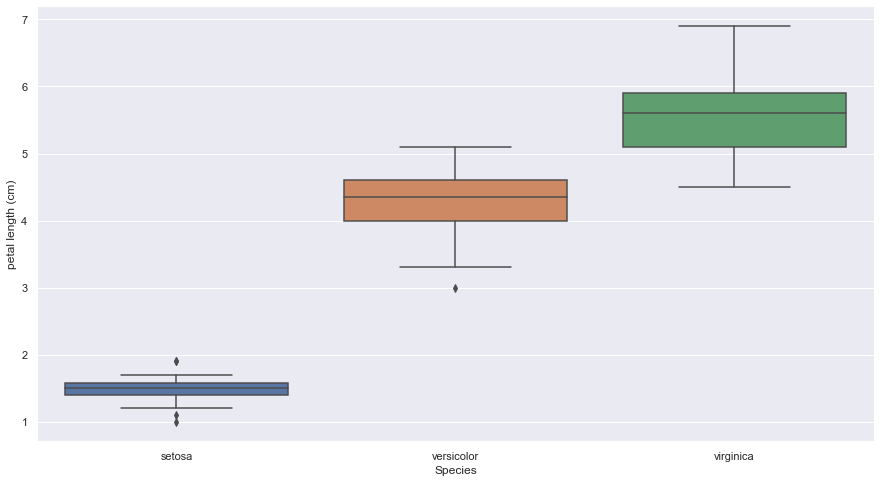

In [64]:
# detecting outliers using boxplot
box_plot = sns.boxplot(x='Species', y='petal length (cm)', data=df);


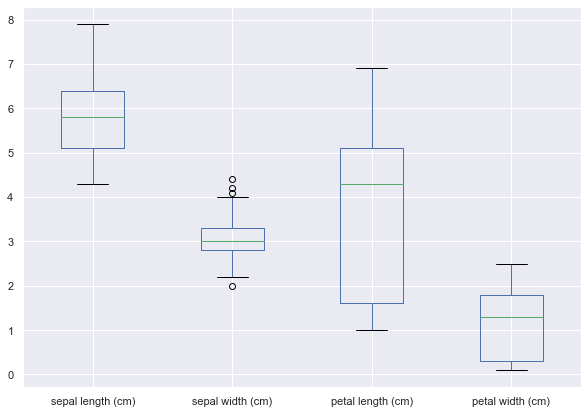

In [102]:
plt.figure(figsize = (10, 7))
df.boxplot()

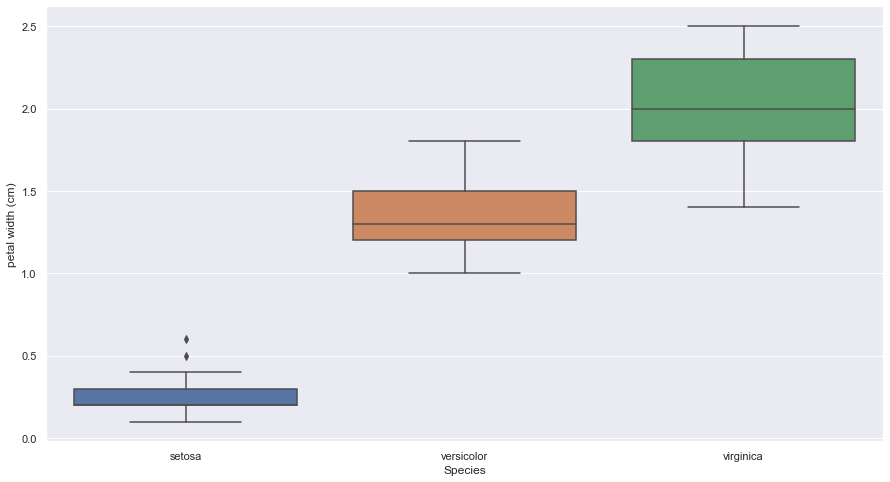

In [65]:
# checking for outliers using boxplot 
box = sns.boxplot(x='Species', y='petal width (cm)', data=df);

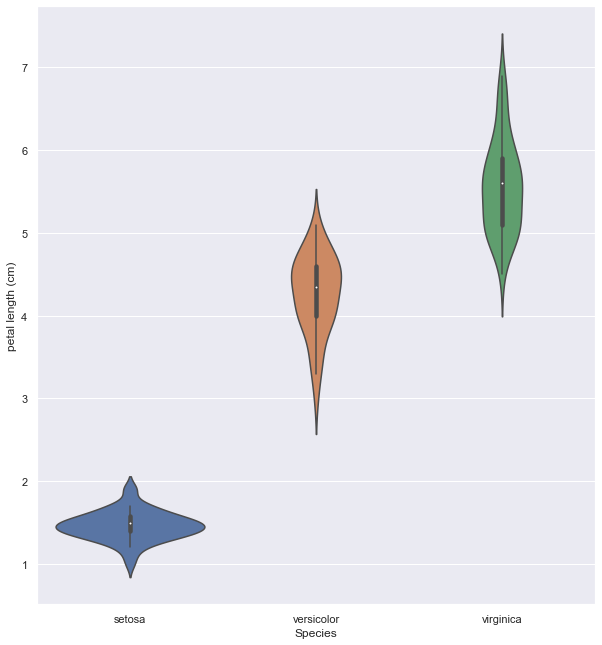

In [71]:
# detecting outliers using violin plot
plt.figure(figsize=(10,11))
sns.violinplot(x='Species', y='petal length (cm)', data=df);

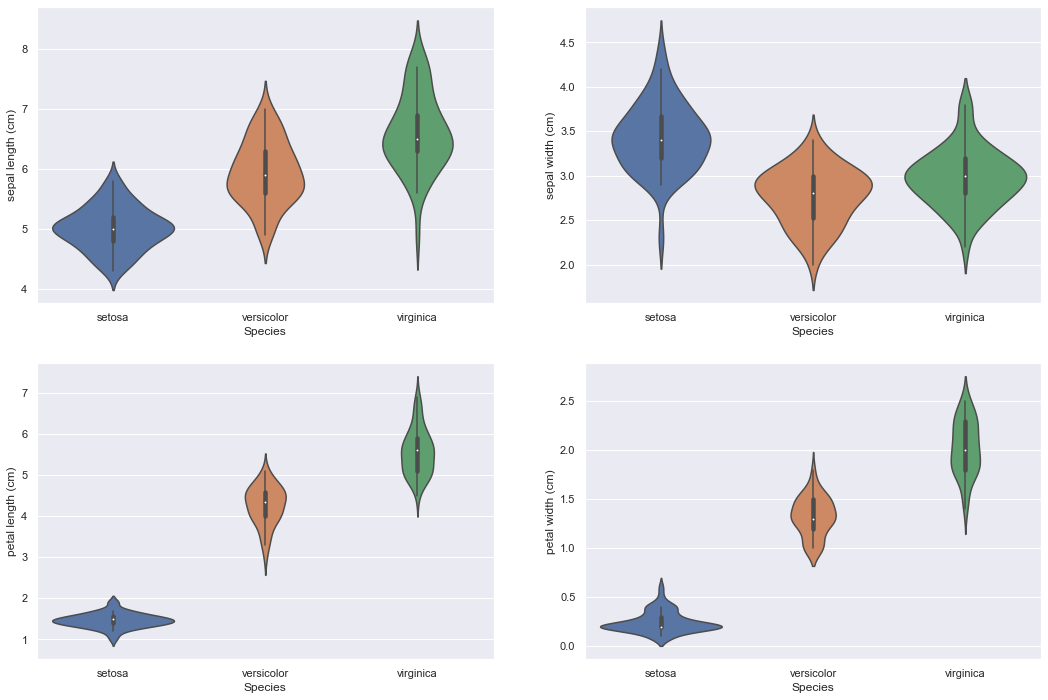

In [98]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="sepal length (cm)",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="sepal width (cm)",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="petal length (cm)",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="petal width (cm)",data=df)

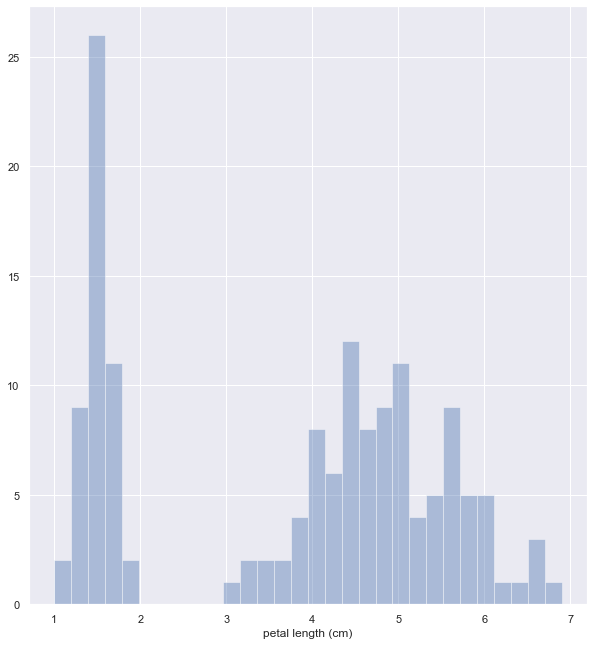

In [72]:
# see the distribution of the data
plt.figure(figsize=(10,11))
dist = sns.distplot(df['petal length (cm)'], kde=False, bins=30);

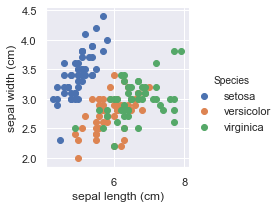

In [83]:

sns.FacetGrid(df,hue="Species")\
.map(plt.scatter,"sepal length (cm)","sepal width (cm)")\
.add_legend();
plt.show()

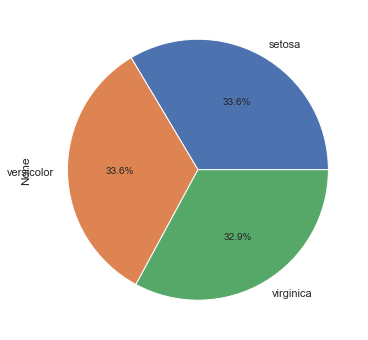

In [89]:
# pie chart of the species
plt.figure(figsize=(18,11))
pie = df.groupby('Species').size().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

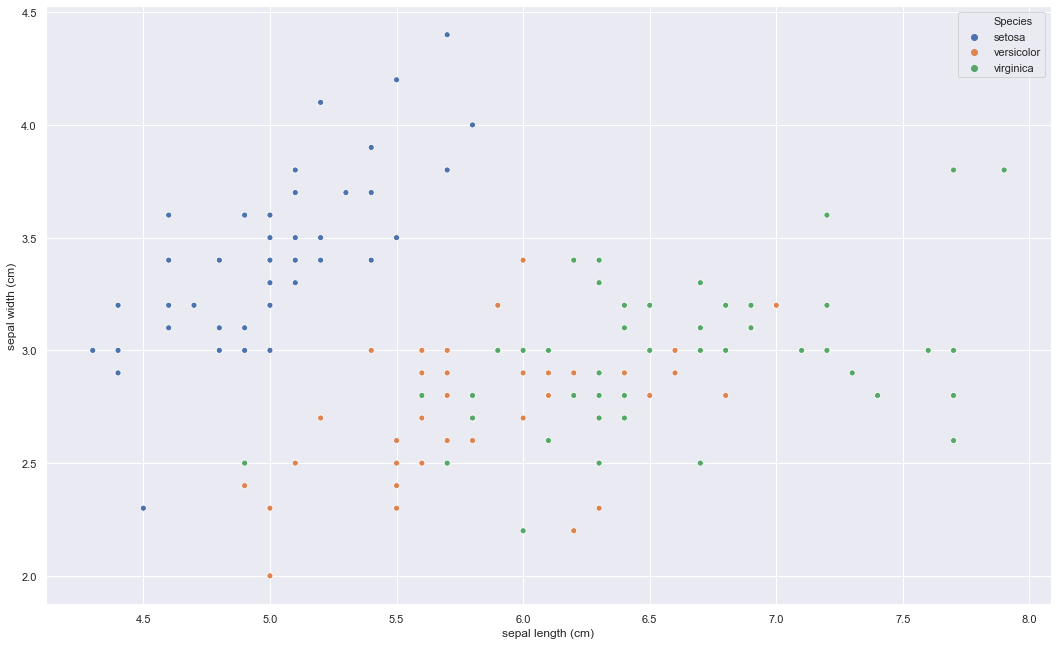

In [91]:
# scatter plot of sepal length vs sepal width
plt.figure(figsize=(18,11))
scatter = sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Species", data=df);

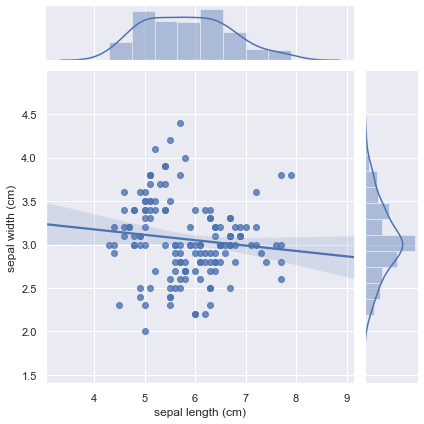

In [92]:
# QQ plot of sepal length vs sepal width
qq = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, kind="reg");

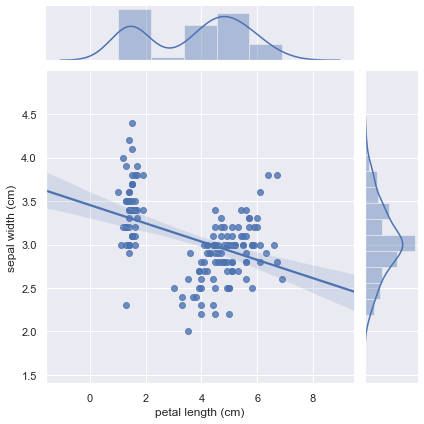

In [94]:
# QQ plot for all the features  in the dataset
qq2 = sns.jointplot(x="petal length (cm)", y="sepal width (cm)", data=df, kind="reg");

# Data Preprocessing for the modelling

In [106]:
# splitting the data into train and test
X = df.drop('Species', axis=1)
y = df['Species']

In [107]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
X_train.shape

(104, 4)

In [109]:
y_test.shape

(45,)

In [110]:
# standardizing the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [114]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)
# scaler2 = MinMaxScaler()
# scaler2.fit_transform(X_train)


In [115]:
# import the models we will use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [122]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [124]:
model = LogisticRegression()  
model.fit(X_train, y_train)
model.predict(X_test)
result = model.score(X_test, y_test)
print("the score of the model is: ", result)

the score of the model is:  0.8888888888888888


In [ ]:
help(model)

In [131]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict(X_test)
result = model.score(X_test, y_test)
print("the score of the model is: ", result)

the score of the model is:  1.0


In [137]:
model = KNeighborsClassifier(n_neighbors= 2)
model.fit(X_train, y_train)
model.predict(X_test)
result = model.score(X_test, y_test)
print("the score of the model is: ", result)

the score of the model is:  0.9777777777777777


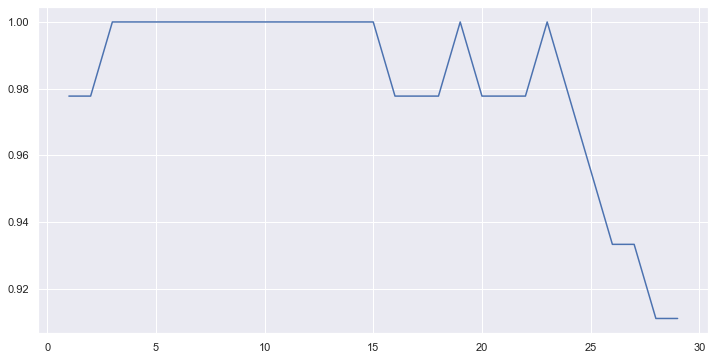

In [142]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)    
    

In [133]:
model = SVC()
model.fit(X_train, y_train)
model.predict(X_test)
result = model.score(X_test, y_test)
print("the score of the model is: ", result)

the score of the model is:  1.0


In [134]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.predict(X_test)
result = model.score(X_test, y_test)
print("the score of the model is: ", result)

the score of the model is:  1.0


In [130]:
models = [] # create an empty list
models.append(('LR', LogisticRegression())) # add the model to the list
models.append(('SVM', SVC())) # add the model to the list
models.append(('RF', RandomForestClassifier())) # add the model to the list
models.append(('KNN', KNeighborsClassifier())) # add the model to the list
models.append(('NB', GaussianNB())) # add the model to the list
models.append(('DT', DecisionTreeClassifier())) # add the model to the list

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print( 'the score of the ',name," is : ", model.score(X_test, y_test))







the score of the  LR  is :  0.8888888888888888
the score of the  SVM  is :  1.0
the score of the  RF  is :  1.0
the score of the  KNN  is :  1.0
the score of the  NB  is :  1.0
the score of the  DT  is :  1.0
